<a href="https://colab.research.google.com/github/rajeevfromkrec/pytorch/blob/master/Linear%20regression%20in%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sakshi296/P1-1-Predicting-Diamond-Prices.git

Cloning into 'P1-1-Predicting-Diamond-Prices'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [2]:
!ls

P1-1-Predicting-Diamond-Prices	sample_data


In [3]:
import os

In [4]:
os.listdir('P1-1-Predicting-Diamond-Prices')

['Project__Diamond_Prices.pdf',
 'README.md',
 'diamonds.csv',
 'new-diamonds.csv',
 '.git']

In [5]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader ,random_split, TensorDataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df=pd.read_csv('P1-1-Predicting-Diamond-Prices/diamonds.csv')

In [24]:
df.head()

,carat,cut_ord,color,clarity_ord,price
0,0.51,4,F,4,1749
1,2.25,1,G,1,7069
2,0.70,3,E,5,2757
3,0.47,2,F,4,1243
4,0.30,5,G,7,789


In [23]:
df.describe()

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


In [9]:
df.drop(columns=['Unnamed: 0','clarity','cut'], axis=1,inplace=True)

In [10]:
df.columns

Index(['carat', 'cut_ord', 'color', 'clarity_ord', 'price'], dtype='object')

In [11]:
df.head()

,carat,cut_ord,color,clarity_ord,price
0,0.51,4,F,4,1749
1,2.25,1,G,1,7069
2,0.70,3,E,5,2757
3,0.47,2,F,4,1243
4,0.30,5,G,7,789


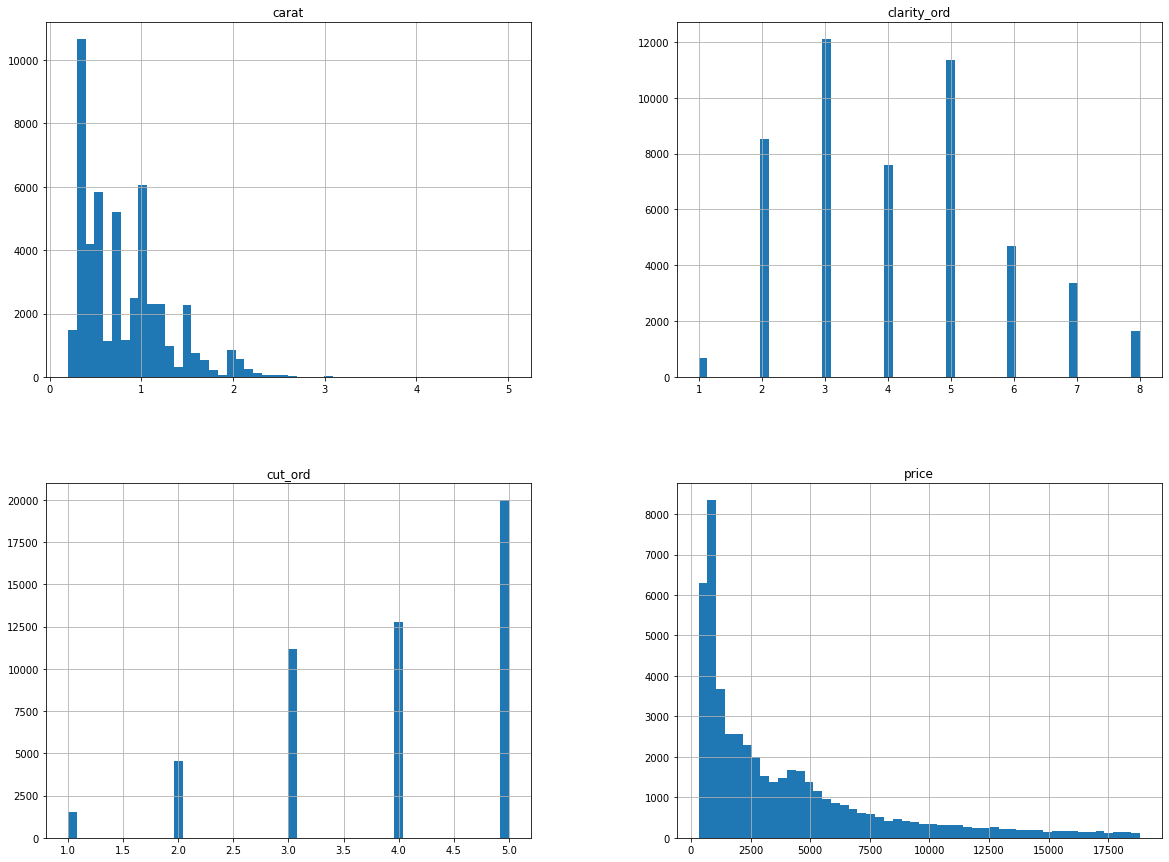

In [25]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        50000 non-null  float64
 1   cut_ord      50000 non-null  int64  
 2   color        50000 non-null  object 
 3   clarity_ord  50000 non-null  int64  
 4   price        50000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


In [14]:
df.isnull().sum()

carat          0
cut_ord        0
color          0
clarity_ord    0
price          0
dtype: int64

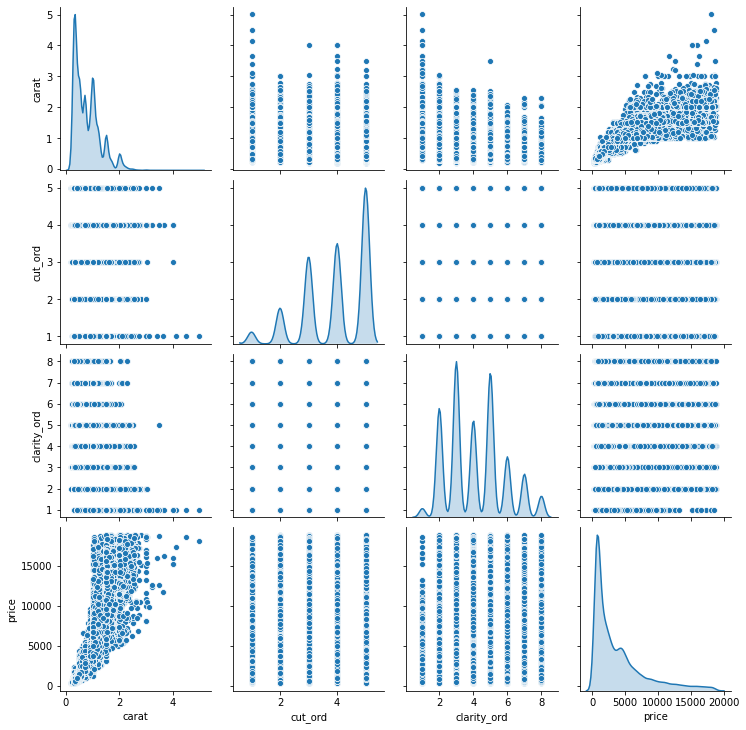

In [26]:
sns.pairplot(df,diag_kind='kde')

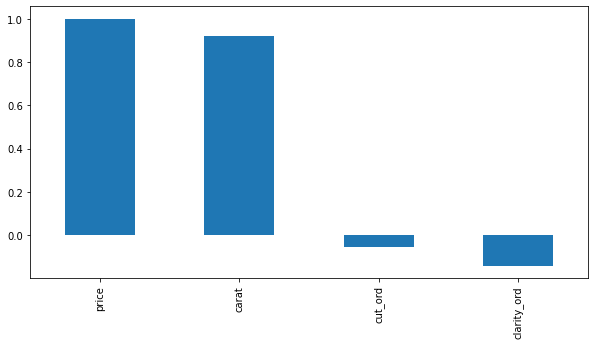

In [16]:
corr_mat=df.corr()
plt.figure(figsize=(10,5))
corr_mat['price'].sort_values(ascending=False).plot(kind='bar')

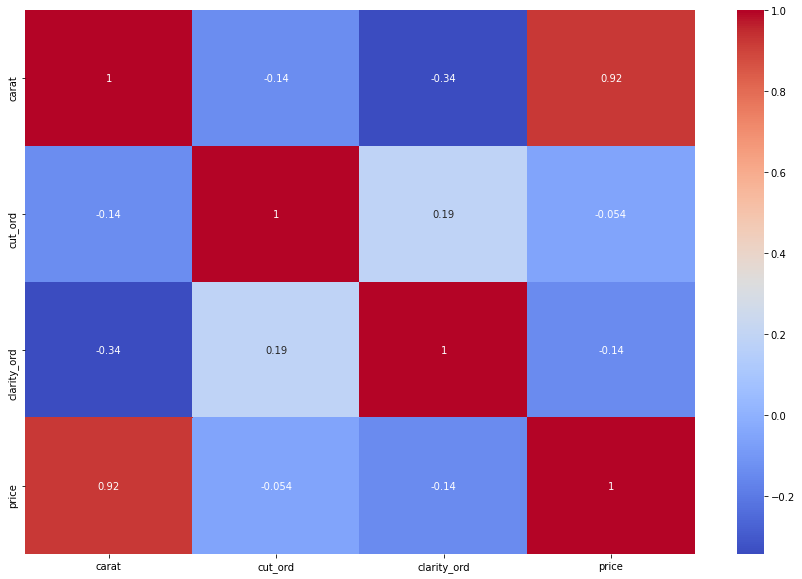

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

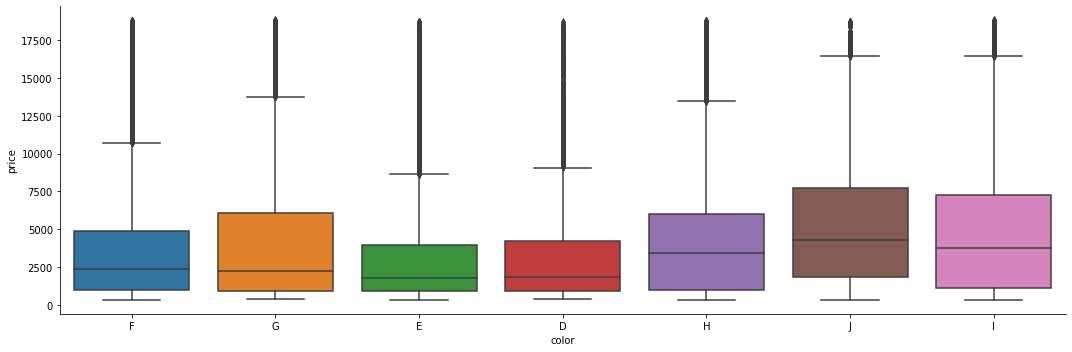

In [28]:
input_cat_columns = df.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=df);

In [30]:
data_color=pd.get_dummies(df['color'])

In [47]:
data_encoded=pd.concat([df[['carat','cut_ord','clarity_ord','price']],data_color], axis=1)

In [91]:
data_encoded.head()


,carat,cut_ord,clarity_ord,price,D,E,F,G,H,I,J
0,0.51,4,4,1749,0,0,1,0,0,0,0
1,2.25,1,1,7069,0,0,0,1,0,0,0
2,0.70,3,5,2757,0,1,0,0,0,0,0
3,0.47,2,4,1243,0,0,1,0,0,0,0
4,0.30,5,7,789,0,0,0,1,0,0,0


In [49]:
val_percent=.20
batch_size=16
torch.manual_seed(2)

In [94]:

input_cols=data_encoded.columns.values.tolist()
input_cols.remove('price')
print(input_cols)
#input_cols.remove('price')
output_col=['price']

['carat', 'cut_ord', 'clarity_ord', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [95]:
inputs_array= data_encoded[input_cols].to_numpy()
output_array=data_encoded[output_col].to_numpy()

In [96]:
print(inputs_array.shape)
print(output_array.shape)

(50000, 10)
(50000, 1)


In [97]:
dataset= TensorDataset(torch.tensor(inputs_array, dtype=torch.float32),torch.tensor(output_array,dtype=torch.float32))

In [98]:
val_size=int((inputs_array.shape[0]*val_percent))
train_size=(inputs_array.shape[0]-val_size)

print(len(dataset))

train_ds,val_ds=random_split(dataset,[train_size,val_size])

50000


In [99]:
train_loader= DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

In [100]:
for xb,yb in val_loader:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([16, 10])
torch.Size([16, 1])


In [122]:
class DPmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(10,1)
    


  def forward(self,xb):
    out=self.linear(xb)
    return out

  def training_step(self, batch):
    inputs, targets = batch 
    out = self(inputs)                 # Generate predictions
    loss = F.mse_loss(out, targets)    # Calculate loss
    return loss
    
  def validation_step(self, batch):
    inputs, targets = batch 
    out = self(inputs)                 # Generate predictions
    loss = F.mse_loss(out, targets)
    return {'val_loss': loss.detach()}
        
  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    return {'val_loss': epoch_loss.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))


In [123]:
model=DPmodel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.1487, -0.0444, -0.0066,  0.2102,  0.1949, -0.2676,  0.0991,  0.0787,
           0.1129,  0.1821]], requires_grad=True), Parameter containing:
 tensor([-0.1432], requires_grad=True)]

In [124]:
for inputs, targets in train_loader: 
  print(targets)
  out = model(inputs)                 # Generate predictions
  loss = F.mse_loss(out, targets) 
  print(out)
  break



tensor([[ 4369.],
        [ 4977.],
        [ 1748.],
        [10802.],
        [ 1597.],
        [ 3816.],
        [  734.],
        [ 1870.],
        [ 2267.],
        [11419.],
        [12225.],
        [ 6754.],
        [ 9332.],
        [ 2928.],
        [  462.],
        [ 5312.]])
tensor([[-0.2982],
        [-0.7488],
        [-0.6474],
        [-0.5268],
        [-0.2634],
        [-0.2863],
        [-0.2337],
        [-0.7346],
        [-0.6676],
        [-0.5541],
        [-0.5711],
        [-0.4399],
        [-0.4615],
        [-0.6807],
        [-0.1696],
        [-0.4264]], grad_fn=<AddmmBackward>)


In [125]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [126]:
epochs = 500
lr = 1e-4
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch [1], val_loss: 13293903.0000
Epoch [2], val_loss: 10554955.0000
Epoch [3], val_loss: 8628217.0000
Epoch [4], val_loss: 7222366.0000
Epoch [5], val_loss: 6182650.0000
Epoch [6], val_loss: 5407081.5000
Epoch [7], val_loss: 4823005.0000
Epoch [8], val_loss: 4379872.0000
Epoch [9], val_loss: 4038768.2500
Epoch [10], val_loss: 3774884.7500
Epoch [11], val_loss: 3566992.5000
Epoch [12], val_loss: 3398941.0000
Epoch [13], val_loss: 3264804.7500
Epoch [14], val_loss: 3150689.5000
Epoch [15], val_loss: 3054171.7500
Epoch [16], val_loss: 2972030.5000
Epoch [17], val_loss: 2899882.7500
Epoch [18], val_loss: 2834869.5000
Epoch [19], val_loss: 2776913.7500
Epoch [20], val_loss: 2722548.2500
Epoch [21], val_loss: 2674241.0000
Epoch [22], val_loss: 2627214.0000
Epoch [23], val_loss: 2583822.5000
Epoch [24], val_loss: 2543105.5000
Epoch [25], val_loss: 2505799.2500
Epoch [26], val_loss: 2468317.0000
Epoch [27], val_loss: 2431665.5000
Epoch [28], val_loss: 2397988.7500
Epoch [29], val_loss: 23659